In [1]:
# import libraries 
import requests as req
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#create url list to iterate the pages you want to scrape the data
urls =[]

for x in range(1,67):
    url = "https://www.strava.com/running_races/2017-san-francisco-marathon/results?page="+ str(x)
    urls.append(url)
# print(urls)

# read the data table
df = pd.read_html(urls[0])[0]



In [3]:
#Append dataframe to consolidate all dataframe created by scraping the data

for x in range(1,len(urls)):
    df2 =pd.read_html(urls[x])[0]
    df = df.append(df2)
    

In [4]:
#Reset the index 

df = df.reset_index(drop=True)
df.head()



,Rank,Name,Gender,Age,Finish,Pace,Strava Activity
0,1,Jorge Maravilla,M,39.0,2:28:22,3:31/km,The San Francisco Marathon - 40th Anniver...
1,2,Ben Demaree,M,25.0,2:32:10,3:36/km,SF Marathon. Third Place!
2,3,Chris J.,M,37.0,2:34:42,3:40/km,SF marathon . 6th place . Unforgettable.
3,4,Matthew Duffy,M,27.0,2:37:04,3:43/km,Can't describe how happy I am to finish a...
4,5,Nathan Krah,M,NaN,2:38:50,3:46/km,SF marathon - rough day out there


In [5]:
#drop the last two outlier data to convert the final time to date time
df = df.drop(df.index[[1318,1319]])
df

,Rank,Name,Gender,Age,Finish,Pace,Strava Activity
0,1,Jorge Maravilla,M,39.0,2:28:22,3:31/km,The San Francisco Marathon - 40th Anniver...
1,2,Ben Demaree,M,25.0,2:32:10,3:36/km,SF Marathon. Third Place!
2,3,Chris J.,M,37.0,2:34:42,3:40/km,SF marathon . 6th place . Unforgettable.
3,4,Matthew Duffy,M,27.0,2:37:04,3:43/km,Can't describe how happy I am to finish a...
4,5,Nathan Krah,M,NaN,2:38:50,3:46/km,SF marathon - rough day out there
5,6,Abi Agh,M,31.0,2:39:39,3:47/km,San Francisco Marathon:- I will not rest ...
6,7,Matt Deyo,M,NaN,2:45:47,3:56/km,SF marathon -73/92 splits are not fun
7,8,Robert Ressl-Moyer,M,30.0,2:46:22,3:57/km,Happy with my result. 10th overall with a...
8,9,Alexander Tyner,NaN,NaN,2:48:02,3:59/km,Morning Run
9,10,Iain Macdonald,M,27.0,2:50:13,4:02/km,The San Francisco Marathon


In [6]:
#format the column pace to eleminate strings and column finish to eleminate space
df['Pace'] = df['Pace'].map(lambda x: x.rstrip('/km'))
df['Finish'] = df['Finish'].map(lambda x: x.rstrip(''))
# print(df)

# #format the colume Finish to date time
df['Finish'] = pd.to_datetime(df['Finish'], format = "%H:%M:%S").dt.time


df.head()

,Rank,Name,Gender,Age,Finish,Pace,Strava Activity
0,1,Jorge Maravilla,M,39.0,02:28:22,3:31,The San Francisco Marathon - 40th Anniver...
1,2,Ben Demaree,M,25.0,02:32:10,3:36,SF Marathon. Third Place!
2,3,Chris J.,M,37.0,02:34:42,3:40,SF marathon . 6th place . Unforgettable.
3,4,Matthew Duffy,M,27.0,02:37:04,3:43,Can't describe how happy I am to finish a...
4,5,Nathan Krah,M,NaN,02:38:50,3:46,SF marathon - rough day out there


In [7]:
#Create new column Finish_Sec to store data of finish time converted in seconds
df["Finish_Sec"] = ""
df.head()


,Rank,Name,Gender,Age,Finish,Pace,Strava Activity,Finish_Sec
0,1,Jorge Maravilla,M,39.0,02:28:22,3:31,The San Francisco Marathon - 40th Anniver...,
1,2,Ben Demaree,M,25.0,02:32:10,3:36,SF Marathon. Third Place!,
2,3,Chris J.,M,37.0,02:34:42,3:40,SF marathon . 6th place . Unforgettable.,
3,4,Matthew Duffy,M,27.0,02:37:04,3:43,Can't describe how happy I am to finish a...,
4,5,Nathan Krah,M,NaN,02:38:50,3:46,SF marathon - rough day out there,


In [8]:
#Function to convert datatime data to seconds
pseconds = lambda hms:sum(map(lambda a,b: int(a)*b,hms.split(':'),(3600,60,1)))
pseconds("10:30:00")

37800

In [9]:
#Create new array to store finish_sec data 
Finish_Sec =[]
for x in df['Finish']:
    Finish_Sec.append( pseconds(str(x)))
len(df['Finish'])

1318

In [10]:
#store the finish_Sec array data into dataframe and co
df["Finish_Sec"] = Finish_Sec

In [11]:
df

,Rank,Name,Gender,Age,Finish,Pace,Strava Activity,Finish_Sec
0,1,Jorge Maravilla,M,39.0,02:28:22,3:31,The San Francisco Marathon - 40th Anniver...,8902
1,2,Ben Demaree,M,25.0,02:32:10,3:36,SF Marathon. Third Place!,9130
2,3,Chris J.,M,37.0,02:34:42,3:40,SF marathon . 6th place . Unforgettable.,9282
3,4,Matthew Duffy,M,27.0,02:37:04,3:43,Can't describe how happy I am to finish a...,9424
4,5,Nathan Krah,M,NaN,02:38:50,3:46,SF marathon - rough day out there,9530
5,6,Abi Agh,M,31.0,02:39:39,3:47,San Francisco Marathon:- I will not rest ...,9579
6,7,Matt Deyo,M,NaN,02:45:47,3:56,SF marathon -73/92 splits are not fun,9947
7,8,Robert Ressl-Moyer,M,30.0,02:46:22,3:57,Happy with my result. 10th overall with a...,9982
8,9,Alexander Tyner,NaN,NaN,02:48:02,3:59,Morning Run,10082
9,10,Iain Macdonald,M,27.0,02:50:13,4:02,The San Francisco Marathon,10213


In [12]:
#create an array of time using range function to represent time from 2:30 through 10:30 in seconds. 
time_range = list(range(9000,37800, 60))
time_range
len(time_range)

480

In [13]:
# use the groupby function to count the number of runners who has the finish_sec time between time range
run_count = df.groupby(pd.cut(df.Finish_Sec, time_range)).count()

In [14]:
run_count.head()


,Rank,Name,Gender,Age,Finish,Pace,Strava Activity,Finish_Sec
Finish_Sec,,,,,,,,
"(9000, 9060]",0,0,0,0,0,0,0,0
"(9060, 9120]",0,0,0,0,0,0,0,0
"(9120, 9180]",1,1,1,1,1,1,1,1
"(9180, 9240]",0,0,0,0,0,0,0,0
"(9240, 9300]",1,1,1,1,1,1,1,1


In [15]:
#plot bar chart to show the number of runners who completed between 1 min increment 
#first create array of x values, and associated x_tickers

x_plot=list(range(9060,37800, 60))
x_ticks = []
for x in x_plot:
    x_ticks.append(str(time.strftime("%H:%M:%S", time.gmtime(x))))
    
x = []
for i in x_ticks:
    x.append(datetime.strptime(i,'%H:%M:%S').time())

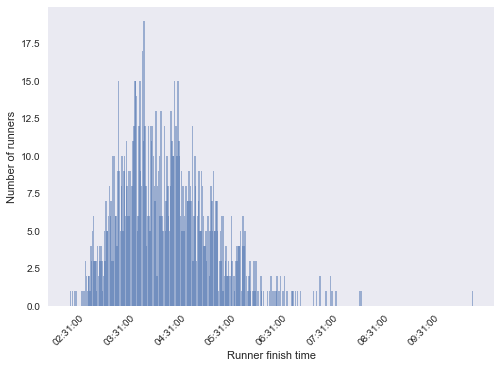

In [16]:
# plot the barchart

bar_width = 100
ax= plt.bar(x,run_count["Name"],bar_width, align='center', alpha=0.5, label='Strava')

plt.xlabel('Runner finish time')
plt.ylabel('Number of runners')

plt.xticks(x, rotation=45)
plt.grid()
#you can change the nbins to whatever number and it will change the ticks
plt.locator_params(nbins=8, axis ='x')

plt.show( )


In [17]:
#dataextract of the dataframe and run_count to csv to use the input for the Merged Strava and SFmarathon
df.to_csv("Strava_SF2017.csv")
run_count.to_csv("Strava_SF2017_count.csv")